In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)
## Quadratic equation used => y = 0.5x^2+1.5x+2+outliers

Text(0, 0.5, 'Y Label')

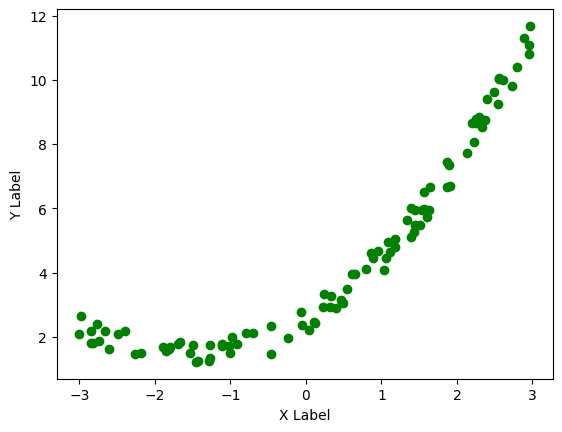

In [6]:
plt.scatter(X,y,color = 'g')
plt.xlabel('X Label')
plt.ylabel('Y Label')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [8]:
## Implement Simple Linear Regression

from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()

In [9]:
reg_1.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_1.predict(X_test))
print(score)

0.7732093373931289


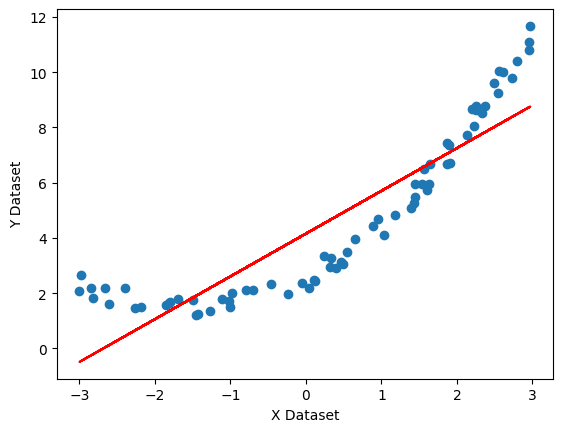

In [11]:
## Visualize the model

plt.plot(X_train, reg_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.show()

In [12]:
## Lets apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures


In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)
print(score)

0.9878732466757296


In [17]:
print(regression.coef_)

[[0.         1.48209311 0.48539091]]


In [18]:
print(regression.intercept_)

[2.5571942]


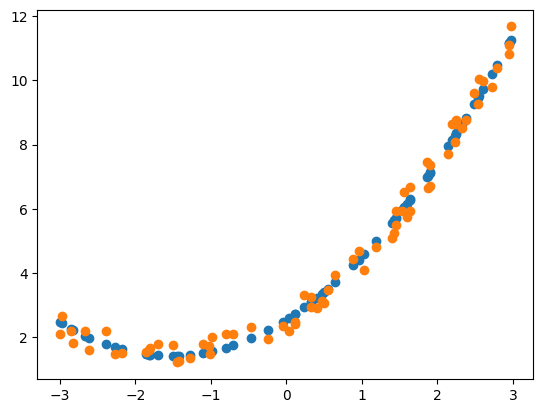

In [21]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

* What happens If I make degree = 3?

In [22]:
poly = PolynomialFeatures(degree=3, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)
print(score)

0.9884036416631172


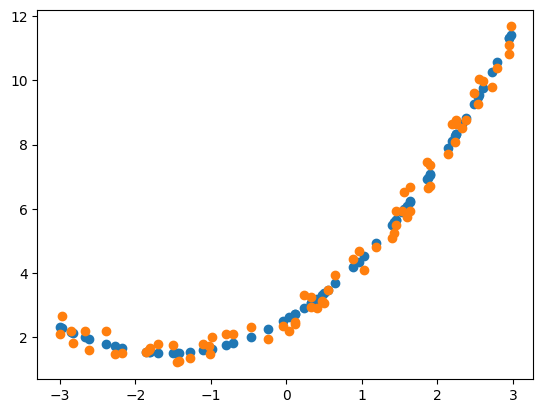

In [24]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

## Prediction Of New Data

In [25]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

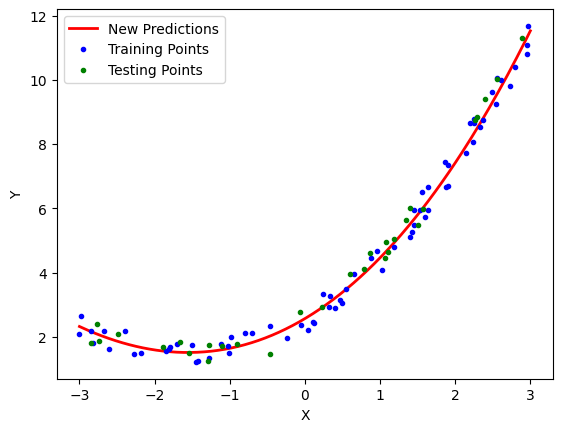

In [29]:
y_new = regression.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.",label='Testing Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Pipeline